In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

customers=pd.read_csv("Customers.csv")
transactions = pd.read_csv("Transactions.csv")
subscriptions = pd.read_csv("Subscriptions.csv")
churn=pd.read_csv("Churn.csv")


In [2]:
customers.shape

(300, 8)

In [3]:
customer_names  = customers[["FirstName","LastName"]]
customer_names.head()

,FirstName,LastName
0,John,Doe
1,Jane,Smith
2,Alice,Johnson
3,Bob,Brown
4,Charlie,Davis


In [4]:
customers["JoinDate"] = pd.to_datetime(customers["JoinDate"], format = "%d-%m-%Y")

In [5]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   CustomerID   300 non-null    int64         
 1   FirstName    299 non-null    object        
 2   LastName     299 non-null    object        
 3   Email        298 non-null    object        
 4   PhoneNumber  298 non-null    object        
 5   JoinDate     298 non-null    datetime64[ns]
 6   Status       299 non-null    object        
 7   Region       299 non-null    object        
dtypes: datetime64[ns](1), int64(1), object(6)
memory usage: 18.9+ KB


In [6]:
transactions["TransactionDate"] = pd.to_datetime(transactions["TransactionDate"],format = "%d-%m-%Y")
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216 entries, 0 to 215
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   TransactionID    216 non-null    int64         
 1   CustomerID       216 non-null    int64         
 2   TransactionDate  216 non-null    datetime64[ns]
 3   Amount           216 non-null    int64         
 4   TransactionType  216 non-null    object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 8.6+ KB


In [7]:
subscriptions[["StartDate", "EndDate"]] = subscriptions[["StartDate", "EndDate"]].apply(pd.to_datetime, format="%d-%m-%Y")
subscriptions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 399 entries, 0 to 398
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   SubscriptionID  399 non-null    int64         
 1   CustomerID      399 non-null    int64         
 2   StartDate       399 non-null    datetime64[ns]
 3   EndDate         399 non-null    datetime64[ns]
 4   PlanType        399 non-null    object        
dtypes: datetime64[ns](2), int64(2), object(1)
memory usage: 15.7+ KB


In [8]:
churn["ChurnDate"] = pd.to_datetime(churn["ChurnDate"],format = "%d-%m-%Y")
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   ChurnID     100 non-null    int64         
 1   CustomerID  100 non-null    int64         
 2   ChurnDate   100 non-null    datetime64[ns]
 3   Reason      100 non-null    object        
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 3.3+ KB


In [9]:
transactions.describe()

,TransactionID,CustomerID,TransactionDate,Amount
count,216.000,216.000000,216,216.000000
mean,108.500,153.388889,2024-05-07 19:46:40,112.199074
min,1.000,11.000000,2024-01-01 00:00:00,20.000000
25%,54.750,103.750000,2024-04-04 18:00:00,64.500000
50%,108.500,156.500000,2024-05-04 00:00:00,117.500000
75%,162.250,214.250000,2024-07-16 06:00:00,157.250000
max,216.000,270.000000,2024-09-08 00:00:00,200.000000
std,62.498,71.834931,NaN,53.175289


In [10]:
# customers from north america region 
customers_northamerica = customers[customers["Region"] == "North America"]
customers_northamerica.head()

,CustomerID,FirstName,LastName,Email,PhoneNumber,JoinDate,Status,Region
0,1,John,Doe,john.doe@example.com,123-456-7890,2022-01-10,Active,North America
3,4,Bob,Brown,bob.brown@example.com,234-567-8901,2019-06-25,Inactive,North America
6,7,Eva,Harris,eva.h@example.com,567-890-1234,2020-12-22,Inactive,North America
9,10,Hank,Wilson,hank.w@example.com,890-123-4567,2020-05-27,Active,North America
12,13,Kelly,Lewis,kelly.l@example.com,123-456-7890,2018-04-15,Active,North America


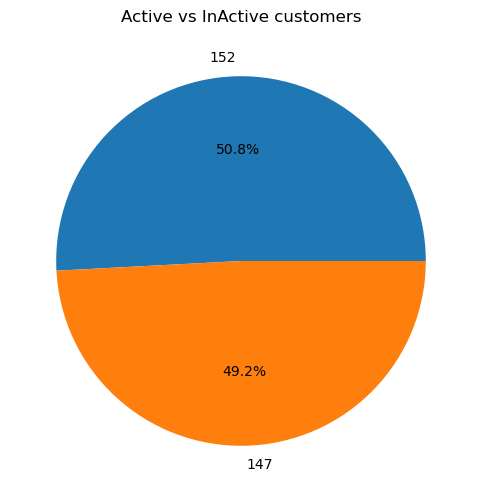

In [11]:
# calculate the number of active and inactive customers 
status_counts = customers['Status'].value_counts()
plt.figure(figsize= (12,6))
plt.pie(status_counts,labels=status_counts,autopct='%1.1f%%')
plt.title("Active vs InActive customers")
plt.show()

In [12]:
# customers joined after jan 1st 2021
customers_afterjan = customers[customers["JoinDate"] > "01-01-2021"]
customers_afterjan.head()

,CustomerID,FirstName,LastName,Email,PhoneNumber,JoinDate,Status,Region
0,1,John,Doe,john.doe@example.com,123-456-7890,2022-01-10,Active,North America
1,2,Jane,Smith,jane.smith@example.com,098-765-4321,2021-12-15,Inactive,Europe
4,5,Charlie,Davis,charlie.d@example.com,345-678-9012,2021-07-14,Active,Europe
8,9,Grace,Miller,grace.m@example.com,789-012-3456,2022-02-18,Inactive,Asia
11,12,Jack,White,jack.w@example.com,012-345-6789,2021-11-20,Inactive,Asia


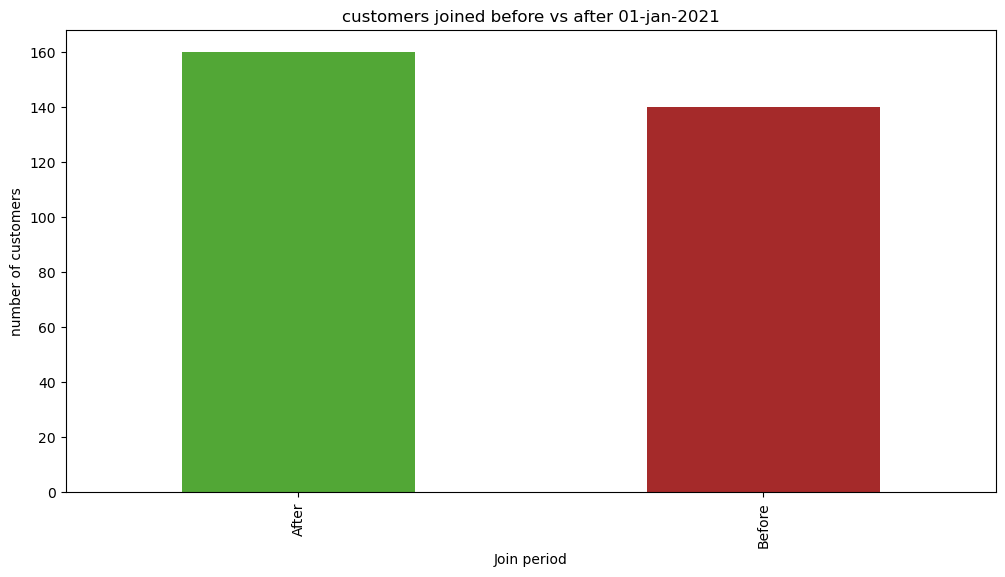

In [13]:
# define the date for comparision 
threshold =pd.Timestamp("01-01-2021")
# create a new column with the threshold 
customers["JoinPeriod"] = customers["JoinDate"].apply(lambda x:"After" if x>threshold else "Before")
join_period = customers["JoinPeriod"].value_counts()
plt.figure(figsize = (12,6))
join_period.plot(kind="bar",color=['#52A736','#A52A2A'])
plt.title("customers joined before vs after 01-jan-2021")
plt.xlabel("Join period")
plt.ylabel("number of customers")
plt.show()

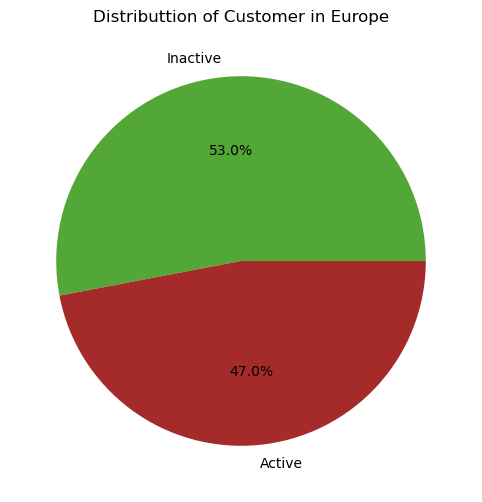

In [14]:
# active vs inactive in europe 
customers_europe = customers[customers['Region']=="Europe"]
status_count_europe = customers_europe["Status"].value_counts()
plt.figure(figsize=(10,6))
plt.pie(status_count_europe ,labels=status_count_europe.index, autopct = '%1.1f%%',colors=['#52A736','#A52A2A'])
plt.title("Distributtion of Customer in Europe")
plt.show()

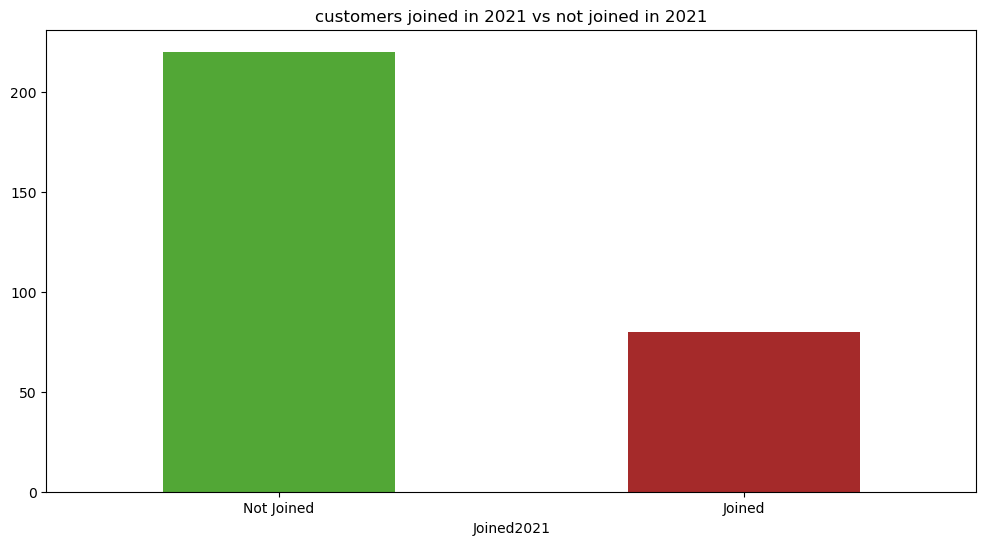

In [15]:
# customers joined in 2021 vs not joined in 2021
customers["Joined2021"] = customers["JoinDate"].dt.year==2021
joined_2021 = customers["Joined2021"].value_counts()
plt.figure(figsize= (12,6))
joined_2021.plot(kind="bar",color=['#52A736','#A52A2A'])
plt.title("customers joined in 2021 vs not joined in 2021")
plt.xticks(ticks=[0,1],labels=["Not Joined","Joined"],rotation=0)
plt.show()

In [16]:
# list down all the customers with  example in their email 
customers_with_example = customers[customers["Email"].str.contains("example",na=False)]
customers_with_example.head(300)

,CustomerID,FirstName,LastName,Email,PhoneNumber,JoinDate,Status,Region,JoinPeriod,Joined2021
0,1,John,Doe,john.doe@example.com,123-456-7890,2022-01-10,Active,North America,After,False
1,2,Jane,Smith,jane.smith@example.com,098-765-4321,2021-12-15,Inactive,Europe,After,True
2,3,Alice,Johnson,alice.j@example.com,567-890-1234,2020-03-20,Active,Asia,Before,False
3,4,Bob,Brown,bob.brown@example.com,234-567-8901,2019-06-25,Inactive,North America,Before,False
4,5,Charlie,Davis,charlie.d@example.com,345-678-9012,2021-07-14,Active,Europe,After,True
...,...,...,...,...,...,...,...,...,...,...
295,296,Emily,Brown,emily.brown@example.com,456-789-0123,2021-03-19,Inactive,Asia,After,True
296,297,Liam,Wilson,liam.wilson@example.com,567-890-1234,2020-08-10,Active,North America,Before,False
297,298,Olivia,Perry,olivia.perry@example.com,678-901-2345,2019-06-12,Inactive,Europe,Before,False
298,299,Ella,Johnson,ella.johnson@example.com,789-012-3456,2022-05-18,Active,Asia,After,False


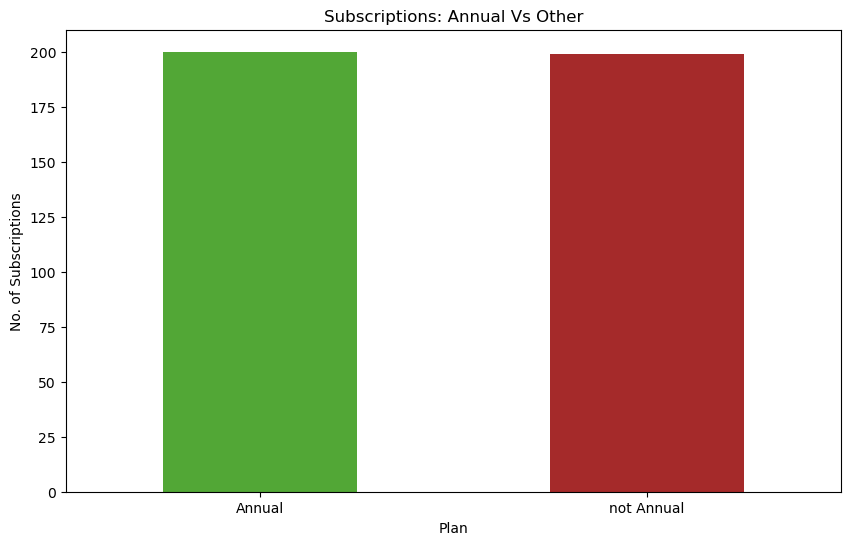

In [17]:
# show me the details of subscriptions with annual and visualize 
subscriptions["plan_category"]= subscriptions["PlanType"].apply(lambda x:"Annual" if x=="Annual" else "not Annual")
annual_counts=subscriptions["plan_category"].value_counts()

plt.figure(figsize=(10,6))
annual_counts.plot(kind="bar",color=['#52A736','#A52A2A'])
plt.title("Subscriptions: Annual Vs Other")
plt.xlabel("Plan")
plt.ylabel("No. of Subscriptions")
plt.xticks(rotation=0)
plt.show()

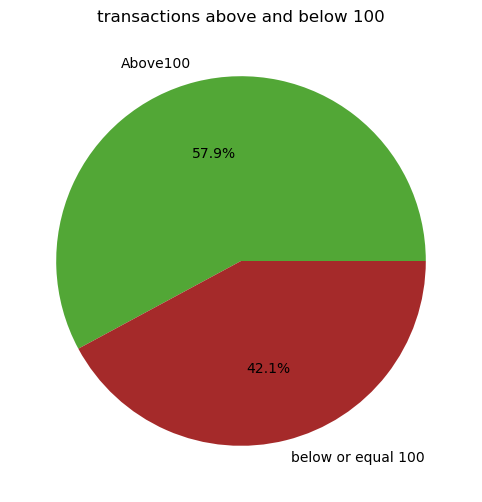

In [18]:
# Visualise the percentage of transactions above & below $100. Create pie chart & bar chart
#Create two categories : "Above 100" & "Below or Equal 100"

transactions["Amountcategory"] = transactions["Amount"].apply(lambda x:"Above100" if x>100 else "below or equal 100")
transactions_amount_counts=transactions["Amountcategory"].value_counts()
plt.figure(figsize = (12,6))
plt.pie(transactions_amount_counts,labels=transactions_amount_counts.index, autopct= "%1.1f%%", colors=['#52A736','#A52A2A'])
plt.title("transactions above and below 100")
plt.show()

(array([0, 1]), [Text(0, 0, 'Above100'), Text(1, 0, 'below or equal 100')])

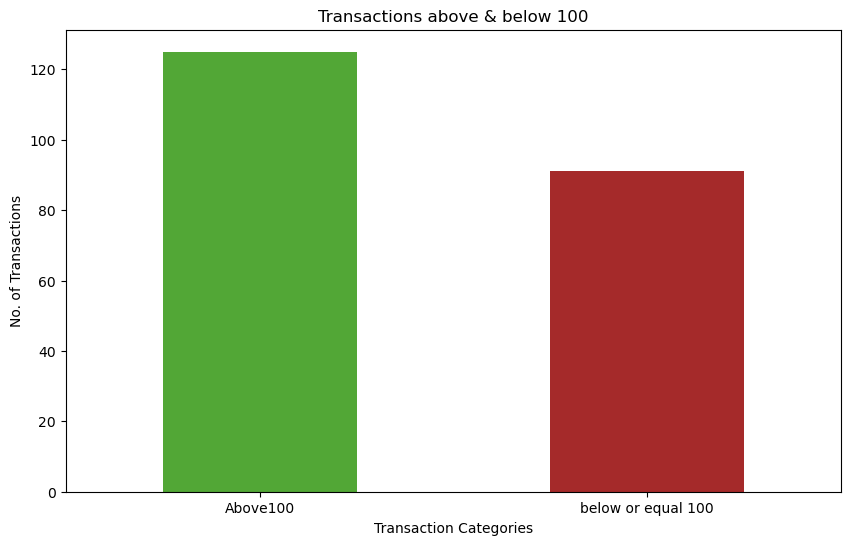

In [19]:
# Bar Chart
plt.figure(figsize=(10,6))
transactions_amount_counts.plot(kind="bar",color=['#52A736','#A52A2A'])
plt.title("Transactions above & below 100")
plt.xlabel("Transaction Categories")
plt.ylabel("No. of Transactions")
plt.xticks(rotation=0)

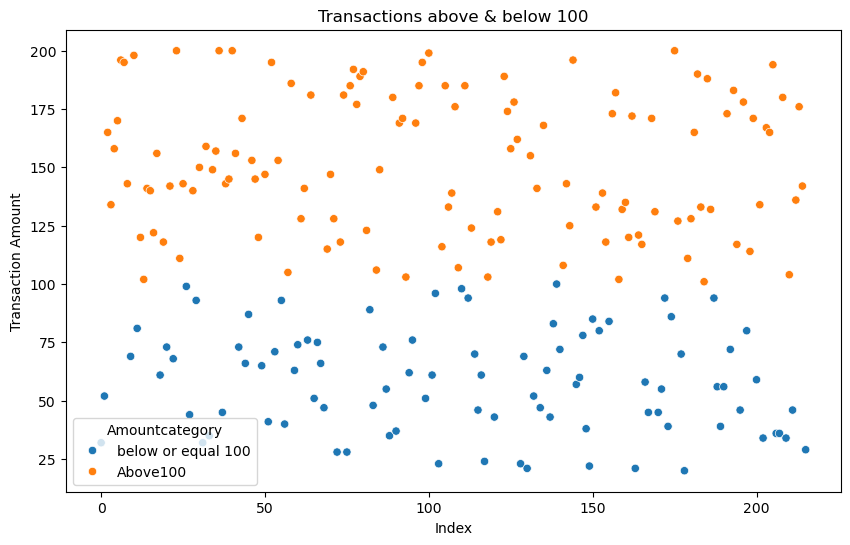

In [20]:
# Scatter Plot
plt.figure(figsize=(10,6))
sns.scatterplot(x= transactions.index, y="Amount", hue="Amountcategory", data=transactions)
plt.title("Transactions above & below 100")
plt.xlabel("Index")
plt.ylabel("Transaction Amount")
plt.show()

In [21]:
# which region has the highest total revenue 
active_customers = customers[customers["Status"] == "Active"]
active_transactions = pd.merge(active_customers,transactions,on = "CustomerID")
revenue_by_region = active_transactions.groupby("Region")["Amount"].sum().sort_values(ascending=False)
print(revenue_by_region)

Region
Europe           4650
North America    4017
Asia             3278
Name: Amount, dtype: int64


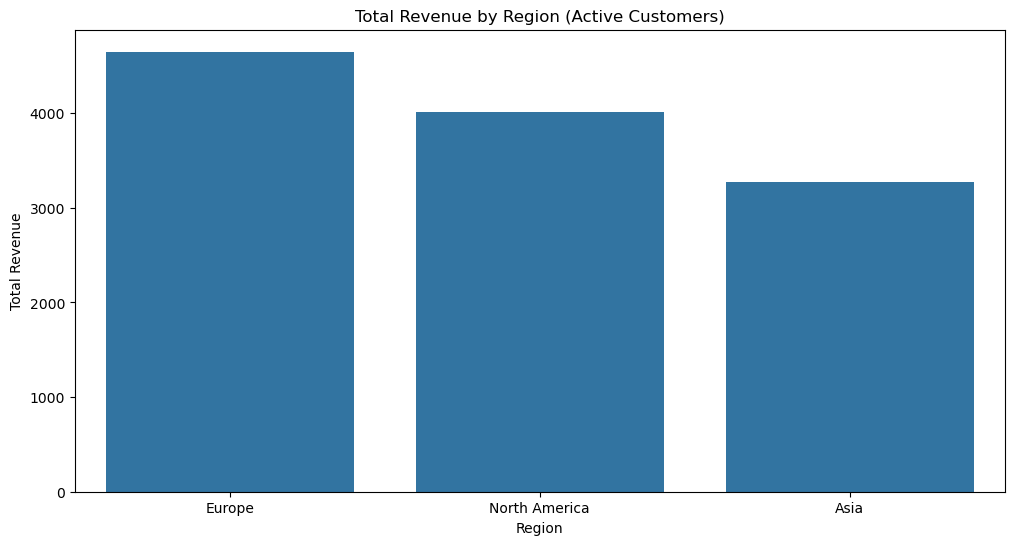

In [22]:
# visualization 
plt.figure(figsize=(12,6))
sns.barplot(x=revenue_by_region.index,y=revenue_by_region.values)
plt.title("Total Revenue by Region (Active Customers)")
plt.xlabel("Region")
plt.ylabel("Total Revenue")
plt.show()

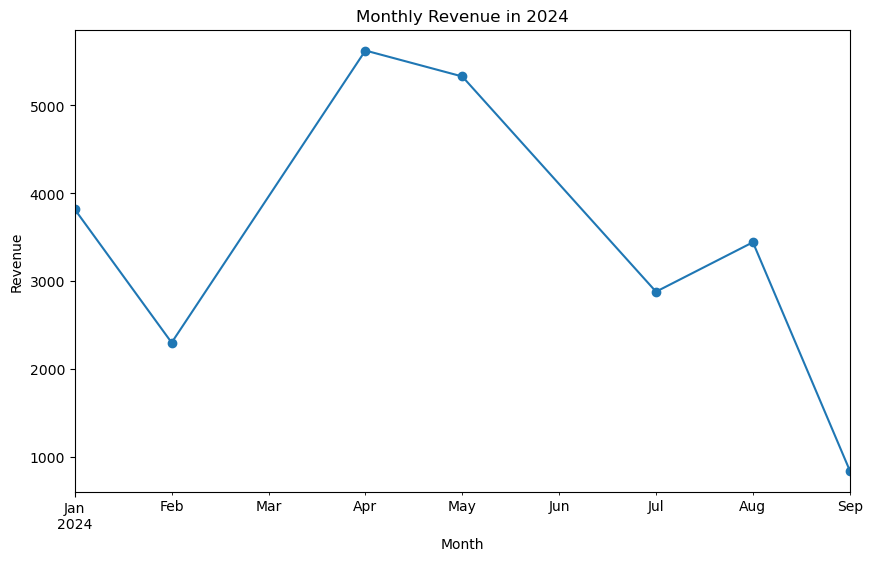

In [23]:
# monthly revenue for the year 2024 
transactions_2024=transactions[transactions["TransactionDate"].dt.year==2024]
#  Extract "Month" as (Year-Month)
transactions_2024["Month"] = transactions_2024["TransactionDate"].dt.to_period("M")
# group and sum amount by Amount
monthly_revenue = transactions_2024.groupby("Month")["Amount"].sum().sort_index()
# plotting
plt.figure(figsize=(10,6))
monthly_revenue.plot(kind="line", marker="o")
plt.title("Monthly Revenue in 2024")
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.show()

<Figure size 1000x600 with 0 Axes>

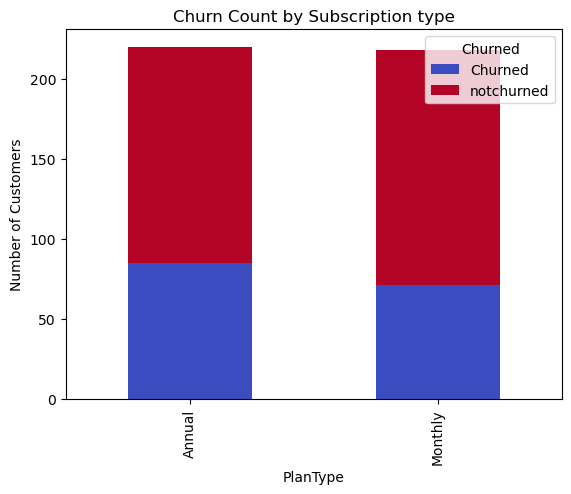

In [24]:
# find out the correlation between churned and subscriptions 
subscriptions_churn=pd.merge(subscriptions,churn,on="CustomerID",how="left")
subscriptions_churn["Churned"]=np.where(subscriptions_churn["ChurnID"].isna(), "notchurned", "Churned")
churn_by_plan = subscriptions_churn.groupby(["PlanType","Churned"]).size().unstack().fillna(0)
plt.figure(figsize=(10,6))
churn_by_plan.plot(kind="bar",stacked=True,colormap="coolwarm")
plt.title("Churn Count by Subscription type")
plt.ylabel("Number of Customers")
plt.show()


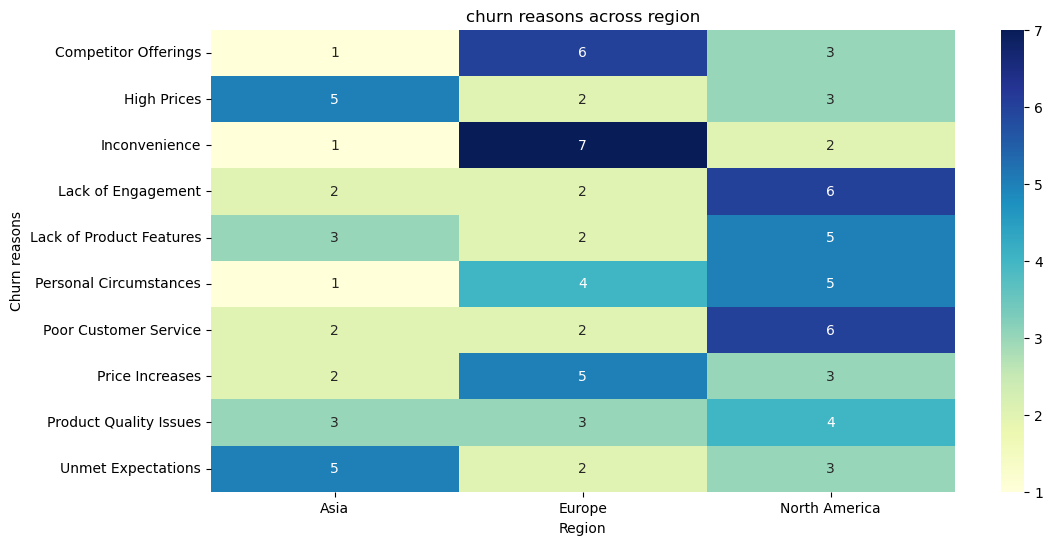

In [28]:
# show churn reasons are distributed across regions 
churn_reasons_region=pd.merge(churn,customers[["CustomerID","Region"]],on="CustomerID",how="left")
pivot=churn_reasons_region.pivot_table(index="Reason",columns="Region",aggfunc="size",fill_value=0)
plt.figure(figsize=(12,6))
sns.heatmap(pivot,annot=True,cmap='YlGnBu')
plt.title("churn reasons across region")
plt.xlabel("Region")
plt.ylabel("Churn reasons")
plt.show()

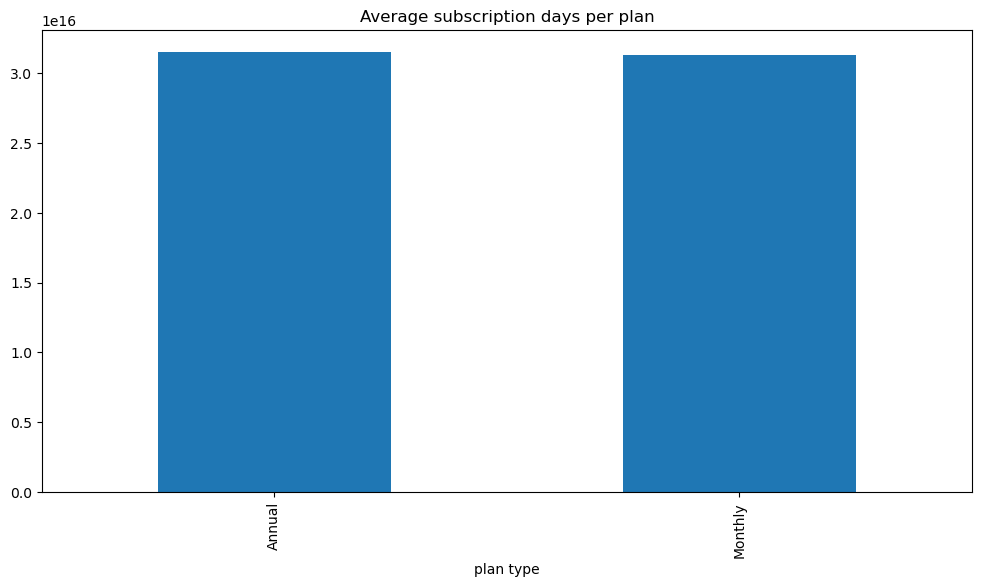

In [31]:
# calculate the average subscription days for each plan 
subscriptions["Avg_duration"]=(subscriptions["EndDate"] - subscriptions["StartDate"])
average_duration = subscriptions.groupby("PlanType")["Avg_duration"].mean()
plt.figure(figsize=(12,6))
average_duration.plot(kind="bar")
plt.title("Average subscription days per plan")
plt.xlabel("plan type")
plt.show()

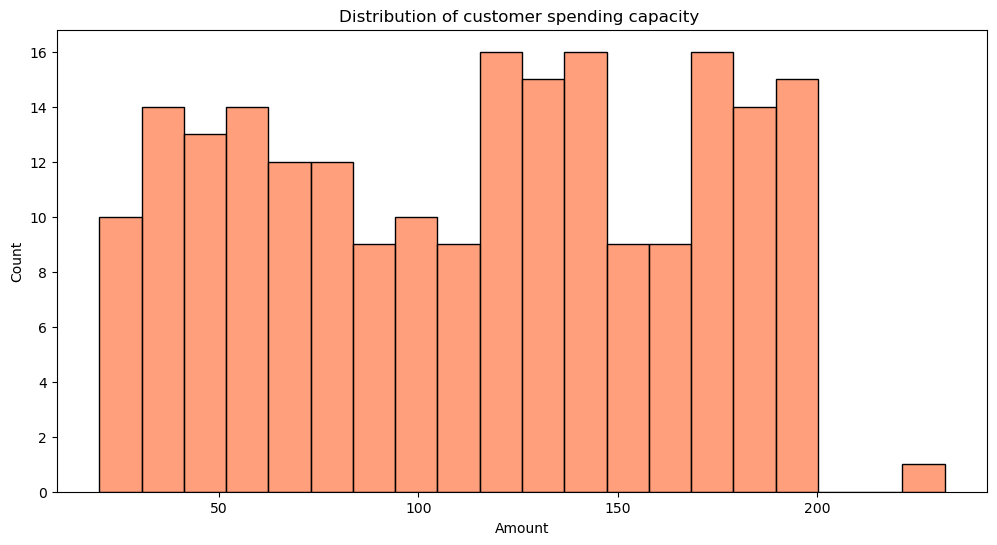

In [37]:
# analyze the customer spending capacity 
spending_per_customer= transactions.groupby("CustomerID")["Amount"].sum().reset_index()
plt.figure(figsize=(12,6))
sns.histplot(spending_per_customer["Amount"],bins=20,color='coral')
plt.title("Distribution of customer spending capacity ")
plt.show()

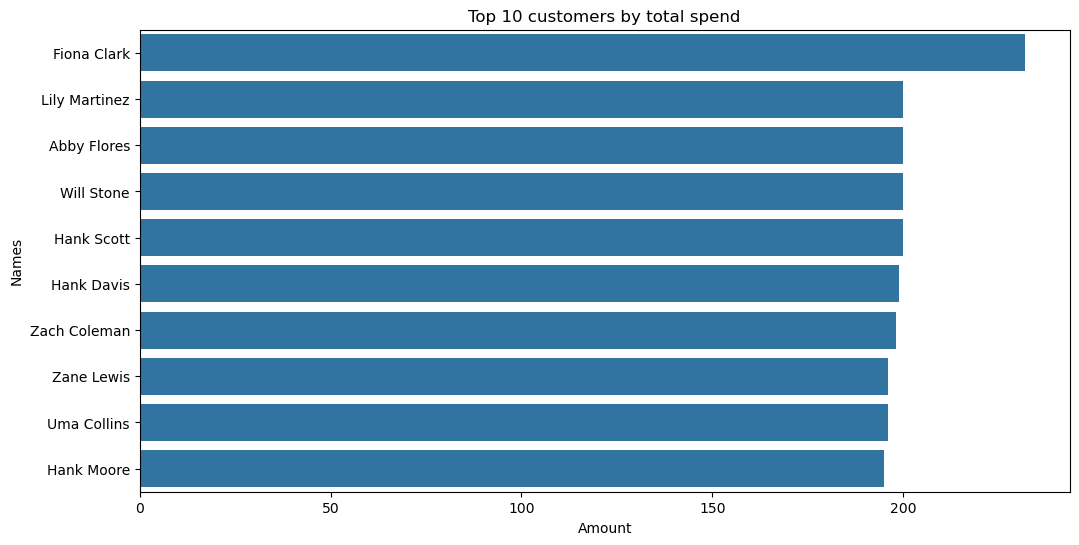

In [40]:
#identify top 10 customers by spend 
top_customers =spending_per_customer.sort_values(by="Amount",ascending=False).head(10)
top_customer_names=pd.merge(top_customers,customers[["CustomerID","FirstName","LastName"]],on="CustomerID")
plt.figure(figsize=(12,6))
sns.barplot(x="Amount",y=top_customer_names["FirstName"]+" "+top_customer_names["LastName"],data=top_customer_names)
plt.title("Top 10 customers by total spend")
plt.ylabel("Names")
plt.show()